<h1 style="text-align:center;"><u>Optimization - Project 2</u></h1>

<h2 style="text-align:center;">Manasa Maganti, Medha Nalamada, Utkarsh Garg, Varsha Manju Jayakumar</h2>

<h3 style="text-align:center;">November 3, 2024</h3>



In [132]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [135]:
#read the two csv files here for testing purposes

old_train_data = pd.read_csv(r'2023data.csv')  # Train
test_data = pd.read_csv(r'2024data.csv')   # Out of Sample
data_2023 = old_train_data.copy()
data_2024 = test_data.copy()

In [137]:
old_train_data.head()

,Date,NDX,ADBE,AMD,ABNB,GOOGL,AMZN,AEP,AMGN,ADI,...,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL,ZS
0,2023-01-03,10862.639648,336.920013,64.019997,84.900002,88.899872,85.820000,88.443291,247.431015,157.418793,...,136.915024,108.099998,154.873657,44.020000,175.435257,286.019989,9.54,169.350006,65.785973,110.190002
1,2023-01-04,10914.799805,341.410004,64.660004,88.720001,87.862434,85.139999,89.049248,250.022141,160.771652,...,137.820984,113.639999,160.529236,44.310001,178.313995,286.829987,10.38,171.220001,66.349274,111.589996
2,2023-01-05,10741.219727,328.440002,62.330002,87.709999,85.987083,83.120003,87.427124,252.357880,154.744293,...,142.271896,110.339996,158.403641,42.590000,175.732025,287.890015,10.86,160.190002,65.006706,104.389999
3,2023-01-06,11040.349609,332.750000,63.959999,88.519997,87.124260,86.080002,89.990829,260.244659,160.393723,...,146.299408,113.059998,166.213287,42.290001,180.915756,290.209991,11.32,161.139999,66.931374,103.959999
4,2023-01-09,11108.450195,341.980011,67.239998,89.239998,87.802582,87.360001,91.314651,255.440781,161.924774,...,146.496338,119.769997,167.655640,43.990002,180.094650,283.230011,11.61,162.929993,67.579185,104.750000


### Exploratory Data Analysis

<b> Plotting for NASDAQ-100 Index with 30 and 90 day moving averages </b>

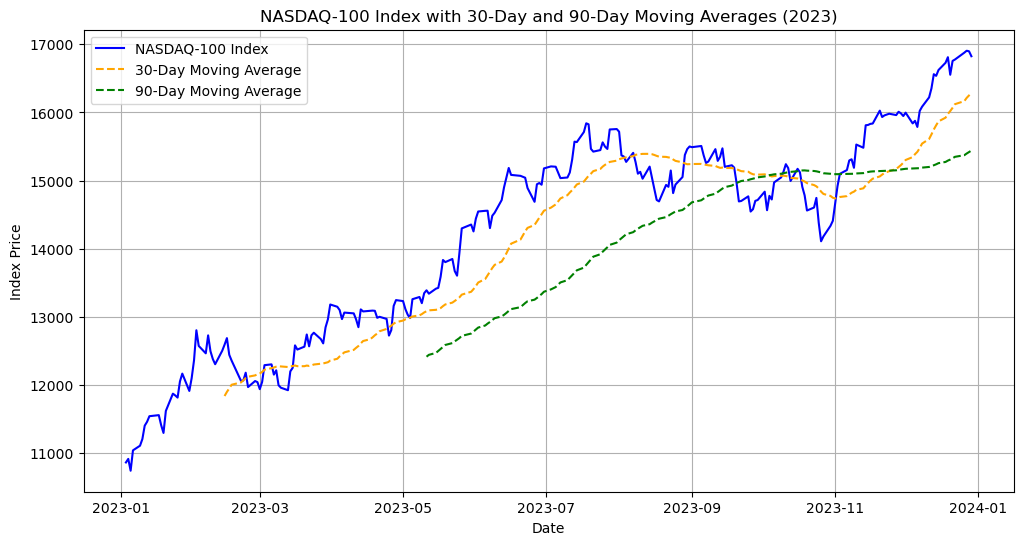

In [141]:
import pandas as pd
import matplotlib.pyplot as plt


data_2023['Date'] = pd.to_datetime(data_2023['Date'])
data_2023.set_index('Date', inplace=True)

# Interpolate missing values in the 'NDX' column
data_2023['NDX'] = data_2023['NDX'].interpolate(method='linear')


data_2023['NDX_30_MA'] = data_2023['NDX'].rolling(window=30).mean()
data_2023['NDX_90_MA'] = data_2023['NDX'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_2023['NDX'], label='NASDAQ-100 Index', color='blue')
plt.plot(data_2023['NDX_30_MA'], label='30-Day Moving Average', color='orange', linestyle='--')
plt.plot(data_2023['NDX_90_MA'], label='90-Day Moving Average', color='green', linestyle='--')
plt.title('NASDAQ-100 Index with 30-Day and 90-Day Moving Averages (2023)')
plt.xlabel('Date')
plt.ylabel('Index Price')
plt.legend()
plt.grid(True)
plt.show()

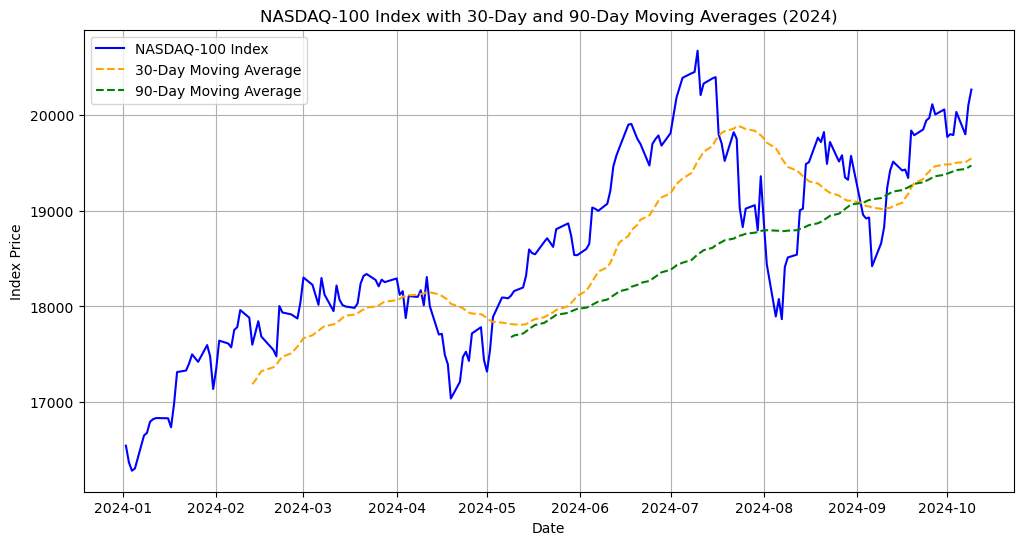

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_2024' is your DataFrame with the 2024 NASDAQ-100 index data
# Ensure the 'Date' column is parsed as a datetime format
data_2024['Date'] = pd.to_datetime(data_2024['Date'])
data_2024.set_index('Date', inplace=True)

data_2024['NDX'] = data_2024['NDX'].interpolate(method='linear')
# Calculate 30-day and 90-day moving averages for the NASDAQ-100 index in 2024
data_2024['NDX_30_MA'] = data_2024['NDX'].rolling(window=30).mean()
data_2024['NDX_90_MA'] = data_2024['NDX'].rolling(window=90).mean()

# Plot the NASDAQ-100 index and moving averages for 2024
plt.figure(figsize=(12, 6))
plt.plot(data_2024['NDX'], label='NASDAQ-100 Index', color='blue')
plt.plot(data_2024['NDX_30_MA'], label='30-Day Moving Average', color='orange', linestyle='--')
plt.plot(data_2024['NDX_90_MA'], label='90-Day Moving Average', color='green', linestyle='--')
plt.title('NASDAQ-100 Index with 30-Day and 90-Day Moving Averages (2024)')
plt.xlabel('Date')
plt.ylabel('Index Price')
plt.legend()
plt.grid(True)
plt.show()


These graphs compare the NASDAQ-100 index prices for 2023 and 2024, with 30-day and 90-day moving averages to smooth out short-term fluctuations. In both years, the index shows an upward trend; however, 2024 exhibits more pronounced volatility, especially with sharper dips and recoveries. The 30-day moving average closely follows these fluctuations, while the 90-day moving average provides a more stable view, highlighting the overall positive trend despite increased short-term volatility in 2024.

<b> Plotting for Daily returns of NASDAQ-100 Index with 30-day Moving Average </b>

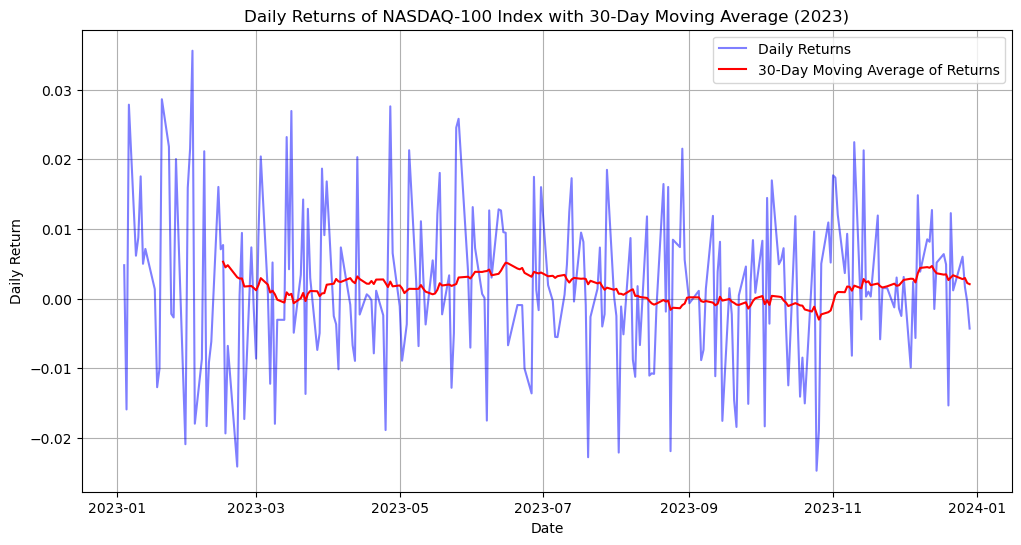

In [147]:
data_2023['NDX_Returns'] = data_2023['NDX'].pct_change()

data_2023['NDX_Returns_30_MA'] = data_2023['NDX_Returns'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_2023['NDX_Returns'], label='Daily Returns', color='blue', alpha=0.5)
plt.plot(data_2023['NDX_Returns_30_MA'], label='30-Day Moving Average of Returns', color='red')
plt.title('Daily Returns of NASDAQ-100 Index with 30-Day Moving Average (2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

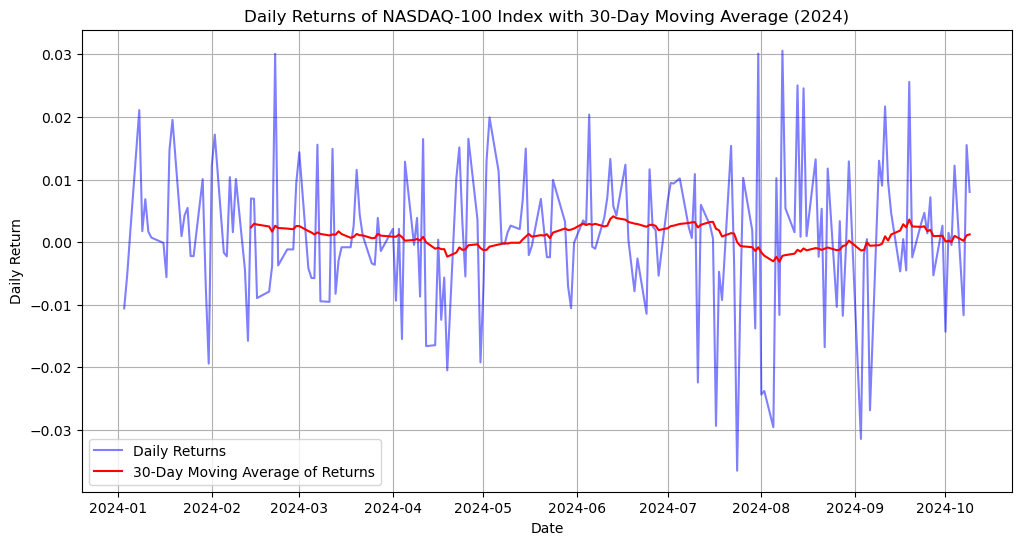

In [148]:

data_2024['NDX_Returns'] = data_2024['NDX'].pct_change()
data_2024['NDX_Returns_30_MA'] = data_2024['NDX_Returns'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_2024['NDX_Returns'], label='Daily Returns', color='blue', alpha=0.5)
plt.plot(data_2024['NDX_Returns_30_MA'], label='30-Day Moving Average of Returns', color='red')
plt.title('Daily Returns of NASDAQ-100 Index with 30-Day Moving Average (2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


These graphs compare the daily returns of the NASDAQ-100 index for 2023 and 2024, with a 30-day moving average (red line) added to smooth the fluctuations.In both years, the daily returns exhibit significant volatility, but 2024 shows more extreme spikes, indicating higher market instability. The 30-day moving average hovers around zero in both years, suggesting that despite the short-term volatility, the average return remained relatively stable over each 30-day period.

<b> Data cleaning and handling missing values </b>

To ensure data continuity and accuracy, we need to handle missing values in the dataset. First, we fill missing values in the 'ARM' column with 0, and for all other columns, we use linear interpolation followed by forward and backward filling to estimate missing data points based on existing trends. This approach maintains the integrity of the data, reducing potential biases and ensures the dataset is complete.

In [154]:
# Step 1: Fill missing values in 'ARM' column with 0
old_train_data['ARM'] = old_train_data['ARM'].fillna(0)

In [156]:
# Step 2: For all other columns, use linear interpolation and forward/backward fill
train_data = old_train_data.interpolate(method='linear', limit_direction='both')
if train_data.isnull().values.any():
    train_data = train_data.fillna(method='ffill').fillna(method='bfill')

In [158]:
date_column = 'Date'
index_column = 'NDX'

drop_columns = [date_column, index_column]

### Part 1 - Calculating the Correlation Matrix

In this analysis, we calculate percentage changes instead of simple price differences to represent daily returns, as percentage changes offer a standardized measure that is easily comparable across different stocks, regardless of their price scales. Unlike price differences, which can vary widely between stocks with high and low absolute prices, percentage changes normalize returns, enabling consistent comparison and meaningful correlation analysis for accurately assessing relationships and patterns in returns.

In [76]:
# Calculate percentage change to calculate the returns
train_returns = train_data.drop(drop_columns, axis=1).pct_change()
index_returns_train = train_data[index_column].pct_change()

# Replace any resulting inf or -inf with NaN, then fill these values with 0
train_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
index_returns_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
train_returns.fillna(0, inplace=True)
index_returns_train.fillna(0, inplace=True)

test_returns = test_data.drop(drop_columns, axis=1).pct_change()
index_returns_test = test_data[index_column].pct_change()
test_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
index_returns_test.replace([np.inf, -np.inf], np.nan, inplace=True)
test_returns.fillna(0, inplace=True)
index_returns_test.fillna(0, inplace=True)

############# Experimented with cosine similarity and Euclidean distance for similarity calculation ###################
# # Calculate Cosine similarity matrix 
# correlation_matrix = pd.DataFrame(
#     cosine_similarity(train_returns.T),
#     index=train_returns.columns,
#     columns=train_returns.columns
# )

# # Calculate Euclidean distance matrix
# correlation_matrix = pd.DataFrame(
#     squareform(pdist(train_returns.T, metric='euclidean')),
#     index=train_returns.columns,
#     columns=train_returns.columns
# )

correlation_matrix = train_returns.corr()  

Correlation function, Euclidean distance, and cosine similarity were evaluated to measure relationships between stock returns. Correlation function yielded the lowest error, indicating that it more accurately captures linear relationships between returns compared to the other methods and so it was selected as it best reflects the movement patterns in returns, providing a more reliable basis for analysis and modeling.

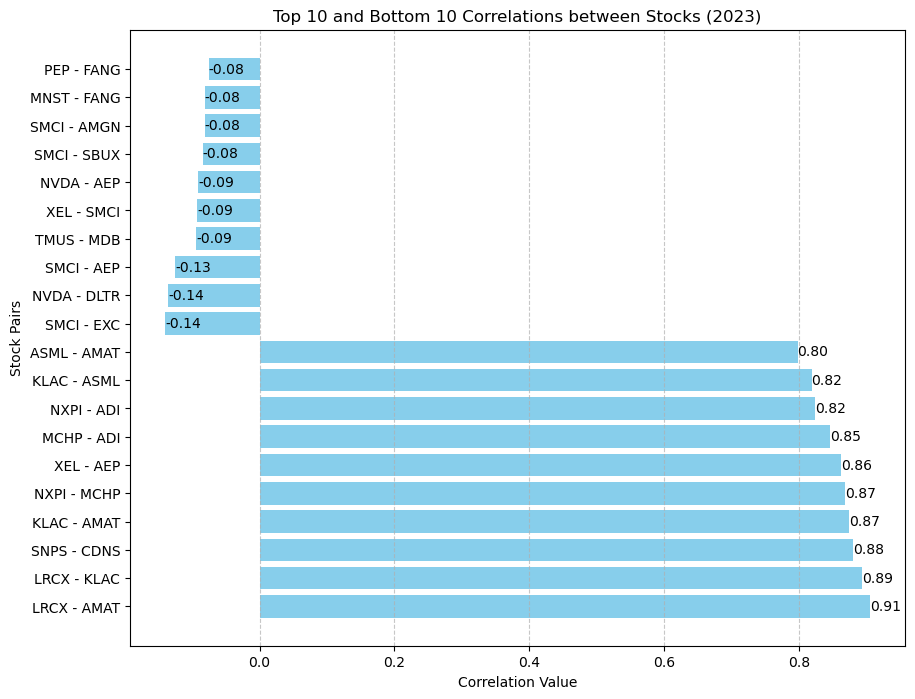

In [79]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

top_correlations = upper_triangle.unstack().dropna().nlargest(10)
bottom_correlations = upper_triangle.unstack().dropna().nsmallest(10)

correlation_data = pd.concat([top_correlations, bottom_correlations])
correlation_data.index = [' - '.join(pair) for pair in correlation_data.index]

plt.figure(figsize=(10, 8))
bars = plt.barh(correlation_data.index, correlation_data.values, color='skyblue')
plt.title('Top 10 and Bottom 10 Correlations between Stocks (2023)')
plt.xlabel('Correlation Value')
plt.ylabel('Stock Pairs')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar, value in zip(bars, correlation_data.values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


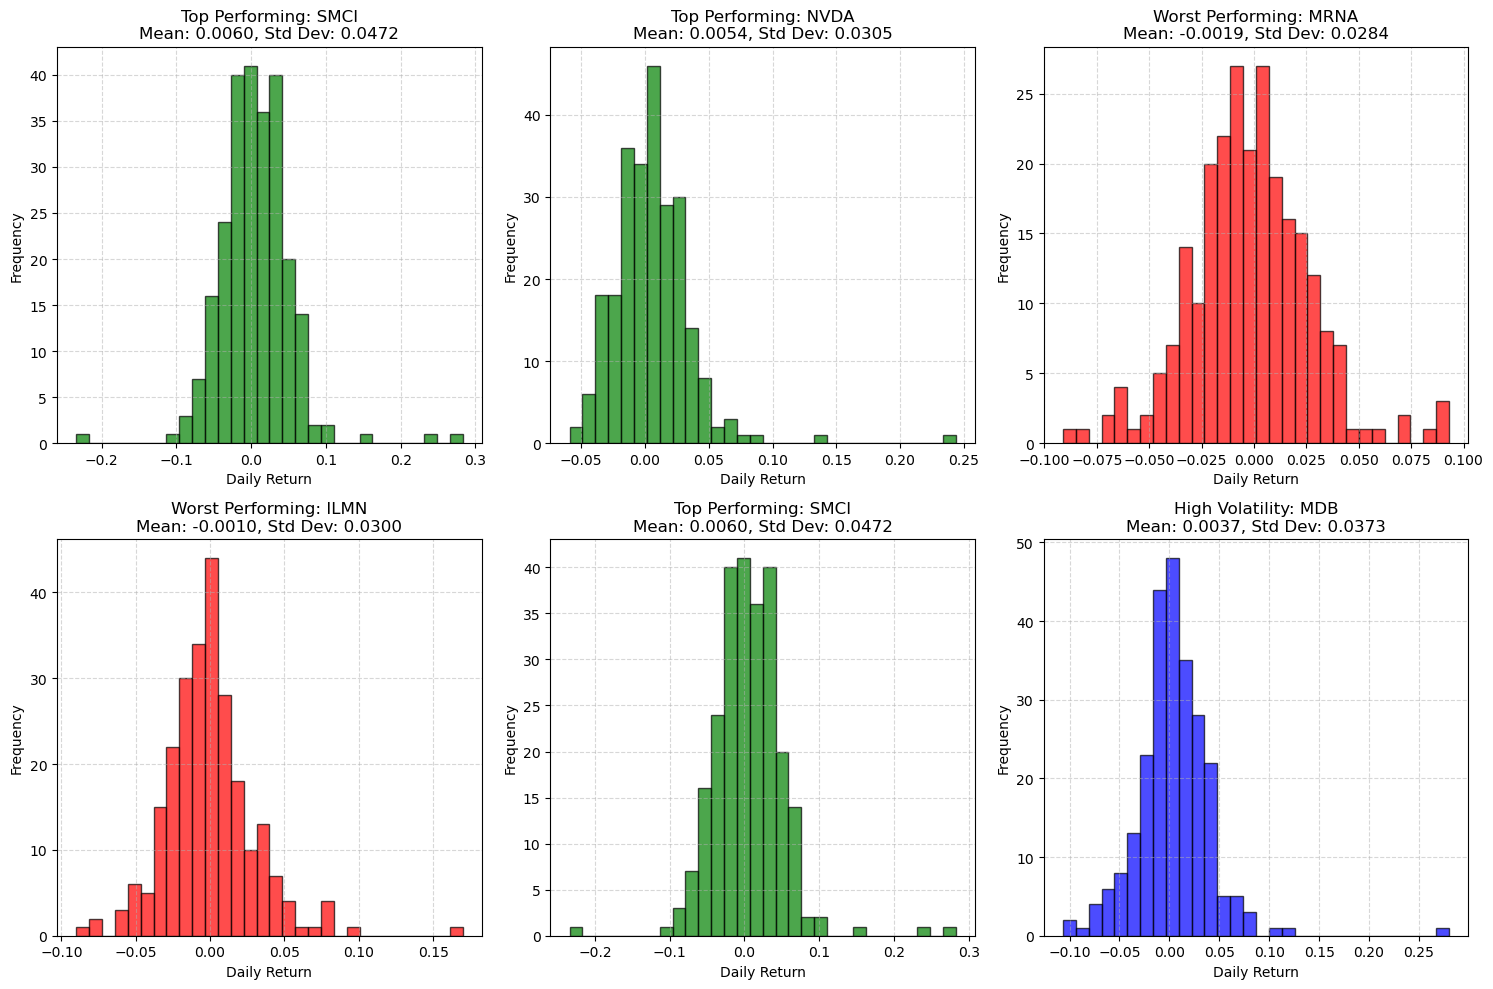

In [80]:
stock_mean_returns = train_returns.mean()
stock_volatility = train_returns.std()

top_performing_stocks = stock_mean_returns.nlargest(2).index.tolist()
worst_performing_stocks = stock_mean_returns.nsmallest(2).index.tolist()
highest_volatility_stocks = stock_volatility.nlargest(2).index.tolist()

selected_stocks = top_performing_stocks + worst_performing_stocks + highest_volatility_stocks

plt.figure(figsize=(15, 10))

for i, stock in enumerate(selected_stocks, 1):
    if stock in top_performing_stocks:
        category = 'Top Performing'
        color = 'green'
    elif stock in worst_performing_stocks:
        category = 'Worst Performing'
        color = 'red'
    else:
        category = 'High Volatility'
        color = 'blue'
    
    plt.subplot(2, 3, i)
    plt.hist(train_returns[stock], bins=30, color=color, edgecolor='black', alpha=0.7)
    mean = train_returns[stock].mean()
    std_dev = train_returns[stock].std()
    plt.title(f'{category}: {stock}\nMean: {mean:.4f}, Std Dev: {std_dev:.4f}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The histograms display the distribution of daily returns for selected stocks, highlighting differences in performance and volatility. Top-performing stocks (SMCI and NVDA) show positive mean returns, indicating growth potential, while the worst performers (MRNA and ILMN) have slightly negative means, suggesting consistent underperformance with lower volatility. The high-volatility stock (MDB) exhibits a wider spread of returns, indicating substantial fluctuations, which presents both high risk and potential opportunities depending on investment strategy.

In [91]:
# Train - 2023
#------------------------------------------------------
num_stocks = len(correlation_matrix)
stock_list = correlation_matrix.columns.tolist()

# Dictionaries of Correlation Matrix and Returns
correlation_dict = correlation_matrix.to_dict()
returns_dict_train = train_returns.to_dict()

date_range_train = index_returns_train.index.values.tolist()

# Out of Sample - 2024
#------------------------------------------------------
returns_dict_test = test_returns.to_dict()
date_range_test = index_returns_test.index.values.tolist()

print("Correlation Matrix of Returns (2023):")
print(correlation_matrix)

print("\nList of Stocks used for Portfolio Construction (2023):")
print(stock_list)

print("\nDaily Returns of NASDAQ-100 Index (2023):")
print(index_returns_train)

print("\nDaily Returns of Portfolio Stocks (2024):")
print(test_returns)

print("\nDaily Returns of NASDAQ-100 Index (2024):")
print(index_returns_test)


Correlation Matrix of Returns (2023):
           ADBE       AMD      ABNB     GOOGL      AMZN       AEP      AMGN  \
ADBE   1.000000  0.592176  0.374101  0.506156  0.530981  0.079789  0.168635   
AMD    0.592176  1.000000  0.341333  0.465201  0.489174 -0.034422  0.012331   
ABNB   0.374101  0.341333  1.000000  0.320332  0.360174  0.065028  0.010738   
GOOGL  0.506156  0.465201  0.320332  1.000000  0.600878  0.072221  0.156608   
AMZN   0.530981  0.489174  0.360174  0.600878  1.000000  0.102570  0.151653   
...         ...       ...       ...       ...       ...       ...       ...   
VRTX   0.167011  0.035034  0.070279  0.165354  0.128016  0.283314  0.320263   
WBD    0.213978  0.192120  0.397553  0.123363  0.276937  0.282088  0.166051   
WDAY   0.516004  0.408922  0.318391  0.371448  0.459136  0.160304  0.092376   
XEL    0.143741  0.003326  0.037405  0.091908  0.099608  0.862833  0.391876   
ZS     0.426819  0.449145  0.376060  0.395901  0.423455  0.017111  0.069888   

            A

### Part 2 - Stock Selection

In [103]:
def select_stocks(m):
    #-------------------------------------------------------------------------
    ## STOCK SELECTION
    #-------------------------------------------------------------------------
    # Model
    model = gp.Model()
    model.ModelSense = GRB.MAXIMIZE
    select_pair = model.addVars(stock_list, stock_list, vtype=GRB.BINARY, name='select_pair') 
    select_stock = model.addVars(stock_list, vtype=GRB.BINARY, name='select_stock') 

    model.addConstr(sum(select_stock[i] for i in stock_list) == m, "stock_count")

    for i in stock_list:
        model.addConstr(sum(select_pair[i, j] for j in stock_list) == 1, "mapping")

    model.addConstrs((select_pair[i, j] <= select_stock[j] for i in stock_list for j in stock_list), "presence")

    model.setObjective(sum(correlation_dict[i][j] * select_pair[i, j] for i in stock_list for j in stock_list))
    model.Params.OutputFlag = 0
    model.optimize()
    
    selected_stocks = []
    for i in stock_list:
        for j in stock_list:
            if select_pair[i, j].X == 1 and j not in selected_stocks:
                selected_stocks.append(j)
                
    return model, selected_stocks


In [105]:
model, selected_stocks = select_stocks(m=5)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-24


In [106]:
model.objVal

51.44502840588646

In [109]:
selected_stocks

['SNPS', 'NXPI', 'INTU', 'PEP', 'HON']

### Part 3 - Stock Selection + Weight Calculation

In [111]:
def calculate_weights(m, selected_stocks):
    #-------------------------------------------------------------------------
    ## PORTFOLIO WEIGHTS
    #-------------------------------------------------------------------------
    weight_model = gp.Model()
    weight_model.ModelSense = GRB.MINIMIZE

    weights = weight_model.addVars(selected_stocks, vtype=GRB.CONTINUOUS, ub=[1] * len(selected_stocks), name='weights')
    abs_diff = weight_model.addVars(index_returns_train.index, vtype=GRB.CONTINUOUS, name='abs_diff')

    weight_model.addConstr(sum(weights[i] for i in selected_stocks) == 1, "sum_weights")  # weights sum to 1

    weight_model.addConstrs(
        (
            abs_diff[date] >= (
                index_returns_train[date] - sum(
                    weights[i] * returns_dict_train[i].get(date, 0)  # Using get to handle missing dates
                    for i in selected_stocks
                )
            ) for date in index_returns_train.index
        ), "abs_constraint_1"
    )

    weight_model.addConstrs(
        (
            abs_diff[date] >= -(
                index_returns_train[date] - sum(
                    weights[i] * returns_dict_train[i].get(date, 0)  # Using get to handle missing dates
                    for i in selected_stocks
                )
            ) for date in index_returns_train.index
        ), "abs_constraint_2"
    )

    weight_model.setObjective(sum(abs_diff[date] for date in index_returns_train.index))

    time_limit = 60  # Define time limit in seconds
    weight_model.Params.OutputFlag = 0
    weight_model.Params.TIME_LIMIT = time_limit

    weight_model.optimize()        

    # 2023 (In-sample)
    returns_train_portfolio = pd.Series(index=index_returns_train.index, dtype=float)
    for date in index_returns_train.index:
        returns_train_portfolio.loc[date] = sum(weights[i].X * returns_dict_train[i].get(date, 0) for i in selected_stocks)   
        
    # 2024 (Out-of-sample)
    returns_test_portfolio = pd.Series(index=index_returns_test.index, dtype=float)
    for date in index_returns_test.index:
        returns_test_portfolio.loc[date] = sum(weights[i].X * returns_dict_test[i].get(date, 0) for i in selected_stocks)  

    weights_df = pd.DataFrame(index=stock_list)
    weights_df[f'm_{m}'] = np.nan
    for i in selected_stocks:
        weights_df[f'm_{m}'].loc[i] = weights[i].X
    weights_df = weights_df[weights_df[f'm_{m}'].notna()]
        
    # Evaluation
    abs_error_train = weight_model.objVal
    abs_error_test = sum(abs(index_returns_test - returns_test_portfolio))
        
    return weight_model, weights_df, abs_error_train, abs_error_test

# Running Portfolio Weights Calculation
weight_model, weights_df, abs_error_train, abs_error_test = calculate_weights(5, selected_stocks)


In [113]:
# Objective Value (absolute error in Train)
weight_model.objVal

1.110919990701497

In [115]:
# Evaluation in Out of Sample (2024)
abs_error_test

1.1436496100755733

In [117]:
# Portfolio Weights
weights_df

,m_5
HON,0.164023
INTU,0.224791
NXPI,0.177157
PEP,0.189129
SNPS,0.244900


In [120]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

# Initialize dictionaries to store results
dict_m = {}
dict_num_stocks = {}
dict_obj_val_corr = {}
dict_obj_val_train = {}
dict_rmse_train = {}
dict_obj_val_test = {}
dict_rmse_test = {}

# Define the list of m values for different portfolio sizes
lst_ms = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create DataFrames to store returns and weights for different portfolio sizes
returns_train_portfolios = pd.DataFrame({date_column: train_data[date_column], index_column: index_returns_train})
returns_test_portfolios = pd.DataFrame({date_column: test_data[date_column], index_column: index_returns_test})
weights_df = pd.DataFrame(index=correlation_matrix.index)

k = 0
time_limit = 60  # Define time limit in seconds

for m in lst_ms:
    #-------------------------------------------------------------------------
    ## STOCK SELECTION
    #-------------------------------------------------------------------------
    selection_model = gp.Model()
    selection_model.ModelSense = GRB.MAXIMIZE

    x = selection_model.addVars(stock_list, stock_list, vtype=GRB.BINARY, name='x')
    y = selection_model.addVars(stock_list, vtype=GRB.BINARY, name='y')

    # Constraints
    selection_model.addConstr(sum(y[i] for i in stock_list) == m, "m")
    for i in stock_list:
        selection_model.addConstr(sum(x[i, j] for j in stock_list) == 1, "Mapping")
    selection_model.addConstrs((x[i, j] <= y[j] for i in stock_list for j in stock_list), "Presence")

    # Objective Function
    selection_model.setObjective(sum(correlation_dict[i][j] * x[i, j] for i in stock_list for j in stock_list))
    
    selection_model.Params.OutputFlag = 0
    selection_model.Params.TIME_LIMIT = time_limit
    
    selection_model.optimize()

    # Selected Stocks
    selected_stocks = []
    for i in stock_list:
        for j in stock_list:
            if x[i, j].X == 1 and j not in selected_stocks:
                selected_stocks.append(j)
    
    print(f"\nSelected Stocks for m={m}: {selected_stocks}")

    #-------------------------------------------------------------------------
    ## PORTFOLIO WEIGHTS
    #-------------------------------------------------------------------------
    weight_model = gp.Model()
    weight_model.ModelSense = GRB.MINIMIZE

    weights = weight_model.addVars(selected_stocks, vtype=GRB.CONTINUOUS, ub=[1] * len(selected_stocks), name='weights')
    abs_diff = weight_model.addVars(date_range_train, vtype=GRB.CONTINUOUS, name='abs_diff')

    weight_model.addConstr(sum(weights[i] for i in selected_stocks) == 1, "sum_weights")
    weight_model.addConstrs(
        (
            abs_diff[date] >= (
                index_returns_train[date] - sum(
                    weights[i] * returns_dict_train[i].get(date, 0)  # Using get to handle missing dates
                    for i in selected_stocks
                )
            ) for date in index_returns_train.index
        ), "abs_constraint_1"
    )

    weight_model.addConstrs(
        (
            abs_diff[date] >= -(
                index_returns_train[date] - sum(
                    weights[i] * returns_dict_train[i].get(date, 0)  # Using get to handle missing dates
                    for i in selected_stocks
                )
            ) for date in index_returns_train.index
        ), "abs_constraint_2"
    )

    weight_model.setObjective(sum(abs_diff[date] for date in date_range_train))

    weight_model.Params.OutputFlag = 0
    weight_model.Params.TIME_LIMIT = time_limit

    weight_model.optimize()        

    print(f"Weights for m={m}:")
    for i in selected_stocks:
        print(f"  {i}: {weights[i].X:.4f}")

    train_portfolio_returns = pd.Series(index=date_range_train, dtype=float)
    for j in date_range_train:
        train_portfolio_returns.loc[j] = sum(weights[i].X * returns_dict_train[i].get(j, 0) for i in selected_stocks)
        
    test_portfolio_returns = pd.Series(index=date_range_test, dtype=float)
    for j in date_range_test:
        test_portfolio_returns.loc[j] = sum(weights[i].X * returns_dict_test[i].get(j, 0) for i in selected_stocks)
    
    returns_train_portfolios[f'm_{m}'] = train_portfolio_returns
    returns_test_portfolios[f'm_{m}'] = test_portfolio_returns
    
    weights_df[f'm_{m}'] = np.nan
    for i in selected_stocks:
        weights_df[f'm_{m}'].loc[i] = weights[i].X
    
    k += 1
    dict_m[k] = m
    dict_num_stocks[k] = len(selected_stocks)
    dict_obj_val_corr[k] = selection_model.objVal
    dict_obj_val_train[k] = weight_model.objVal
    dict_rmse_train[k] = (((index_returns_train - train_portfolio_returns)**2).mean())**0.5
    dict_obj_val_test[k] = sum(abs(index_returns_test - test_portfolio_returns))
    dict_rmse_test[k] = (((index_returns_test - test_portfolio_returns)**2).mean())**0.5

results = pd.DataFrame({
    'm': dict_m, 
    '#stocks': dict_num_stocks, 
    'obj_val_corr': dict_obj_val_corr, 
    'obj_val_train': dict_obj_val_train, 
    'rmse_train': dict_rmse_train, 
    'obj_val_test': dict_obj_val_test, 
    'rmse_test': dict_rmse_test
})

results.to_csv('01_1_results_2steps_approach.csv', index=False)
returns_train_portfolios.to_csv('01_2_returns_2steps_train_portfolios.csv', index=False)
returns_test_portfolios.to_csv('01_3_returns_2steps_test_portfolios.csv', index=False)
weights_df.to_csv('01_4_weights_2steps_approach.csv')

results



Selected Stocks for m=5: ['SNPS', 'NXPI', 'INTU', 'PEP', 'HON']
Weights for m=5:
  SNPS: 0.2449
  NXPI: 0.1772
  INTU: 0.2248
  PEP: 0.1891
  HON: 0.1640

Selected Stocks for m=10: ['SNPS', 'NXPI', 'AMZN', 'AEP', 'GILD', 'IDXX', 'HON', 'BKR', 'PEP', 'CRWD']
Weights for m=10:
  SNPS: 0.1913
  NXPI: 0.1652
  AMZN: 0.2182
  AEP: 0.0291
  GILD: 0.0605
  IDXX: 0.0464
  HON: 0.0625
  BKR: 0.0280
  PEP: 0.1587
  CRWD: 0.0401

Selected Stocks for m=20: ['SNPS', 'AMAT', 'ABNB', 'AMZN', 'AEP', 'GILD', 'NXPI', 'IDXX', 'ARM', 'AZN', 'ADP', 'BKR', 'CHTR', 'HON', 'PEP', 'CRWD', 'DXCM', 'ROST', 'TTWO', 'MRNA']
Weights for m=20:
  SNPS: 0.1369
  AMAT: 0.0663
  ABNB: 0.0020
  AMZN: 0.2313
  AEP: 0.0299
  GILD: 0.0427
  NXPI: 0.0933
  IDXX: 0.0291
  ARM: 0.0088
  AZN: 0.0137
  ADP: 0.0173
  BKR: 0.0321
  CHTR: 0.0241
  HON: 0.0291
  PEP: 0.1080
  CRWD: 0.0398
  DXCM: 0.0000
  ROST: 0.0101
  TTWO: 0.0661
  MRNA: 0.0194

Selected Stocks for m=30: ['SNPS', 'AMAT', 'TTD', 'AMZN', 'AEP', 'GILD', 'NXPI', 'ID

,m,#stocks,obj_val_corr,obj_val_train,rmse_train,obj_val_test,rmse_test
1,5,5,51.445028,1.110920,0.006210,1.143650,0.007810
2,10,10,57.334558,0.923451,0.005032,0.866268,0.006135
3,20,20,65.187926,0.859755,0.004712,0.765656,0.005635
4,30,30,71.484965,0.744583,0.004422,0.714833,0.005268
5,40,40,77.237471,0.637388,0.003714,0.722149,0.005313
6,50,50,82.643246,0.528155,0.003155,0.688768,0.004876
7,60,60,87.473282,0.496423,0.003048,0.672020,0.004868
8,70,70,91.730926,0.344847,0.002313,0.604592,0.004473
9,80,80,95.478613,0.216453,0.001846,0.497925,0.003966
10,90,90,98.383982,0.161659,0.001636,0.424246,0.003641


In [126]:
def plot_comparison(results):
    m_values = results['m']
    obj_val_train = results['obj_val_train']
    obj_val_test = results['obj_val_test']
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(m_values, obj_val_train, marker='o', linestyle='-', color='blue', label='In-sample Error (2023)')
    plt.plot(m_values, obj_val_test, marker='o', linestyle='-', color='red', label='Out-of-sample Error (2024)')
    
    plt.title('Comparison of In-sample and Out-of-sample Errors Across Portfolio Sizes')
    plt.xlabel('Number of Stocks (m)')
    plt.ylabel('Objective Value (Absolute Error)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


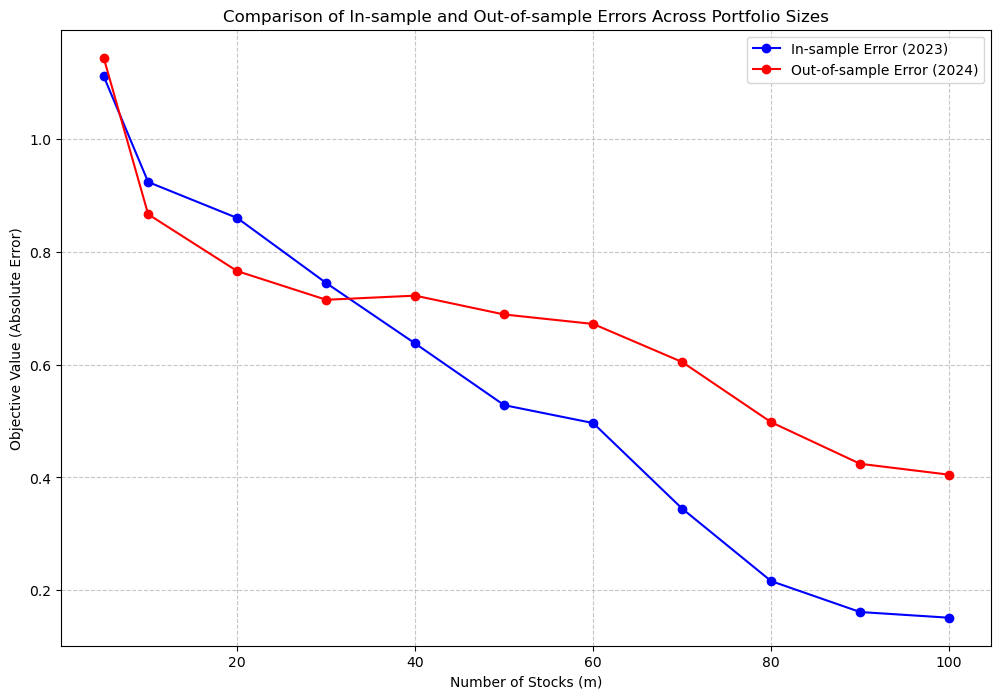

In [128]:
plot_comparison(results)

This graph compares in-sample and out-of-sample errors across various portfolio sizes, indicated by the number of stocks (m). The in-sample error (2023) consistently decreases more sharply than the out-of-sample error (2024), which stablises after a certain portfolio size, which indicates a diminishing return in error reduction as the portfolio size increases.

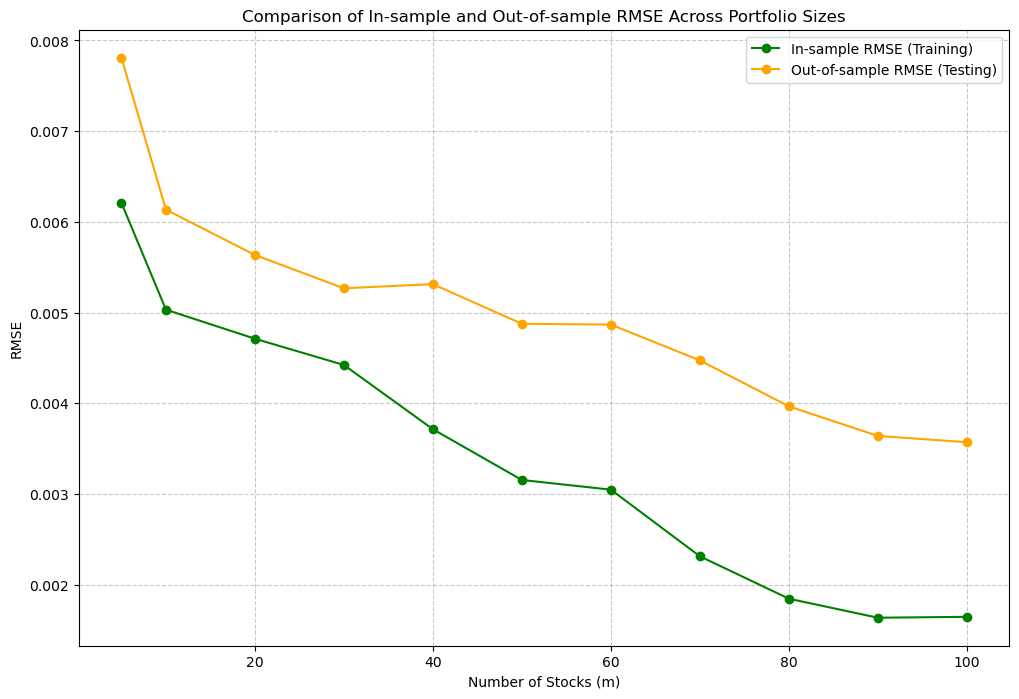

In [129]:
def plot_rmse_comparison(results):
    m_values = results['m']
    rmse_train = results['rmse_train']
    rmse_test = results['rmse_test']
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(m_values, rmse_train, marker='o', linestyle='-', color='green', label='In-sample RMSE (Training)')
    plt.plot(m_values, rmse_test, marker='o', linestyle='-', color='orange', label='Out-of-sample RMSE (Testing)')
    
    plt.title('Comparison of In-sample and Out-of-sample RMSE Across Portfolio Sizes')
    plt.xlabel('Number of Stocks (m)')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_rmse_comparison(results)

This graph compares the in-sample and out-of-sample  RMSE as portfolio size increases. The in-sample RMSE consistently decreases, showing improved model performance during training as more stocks are included. However, the out-of-sample RMSE decreases more gradually, indicating that while larger portfolios enhance training accuracy, the testing improvements are more moderate as the portfolio size grows.

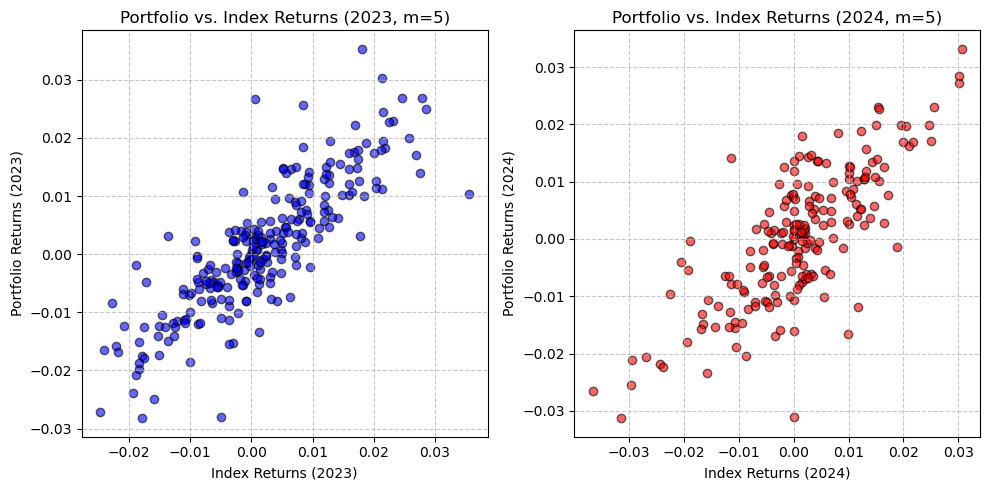

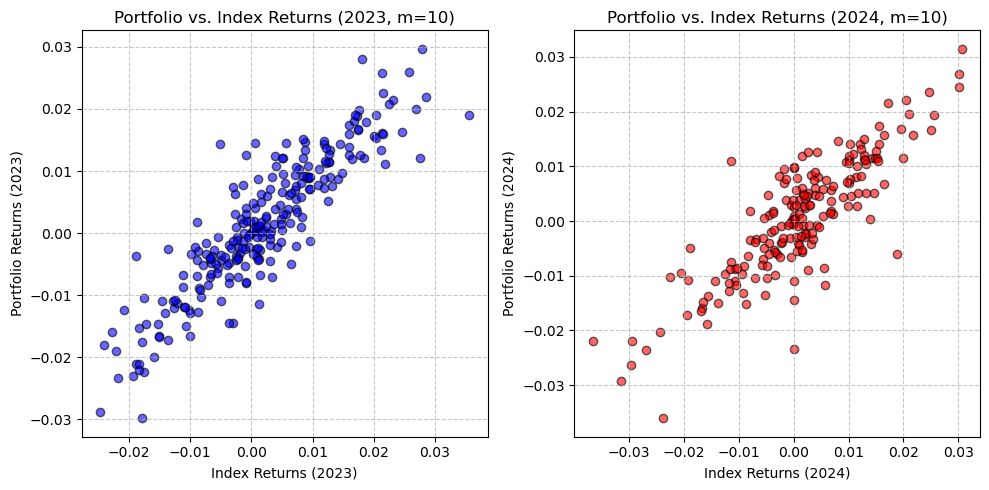

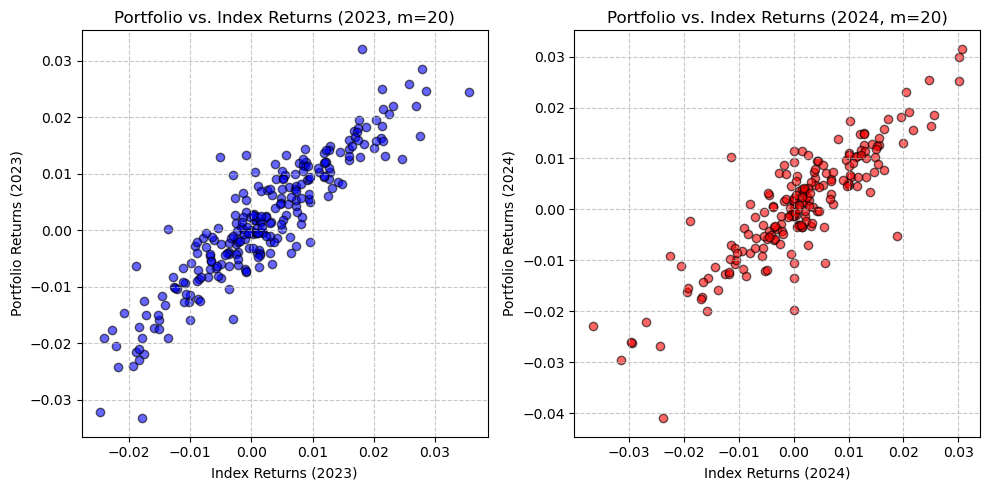

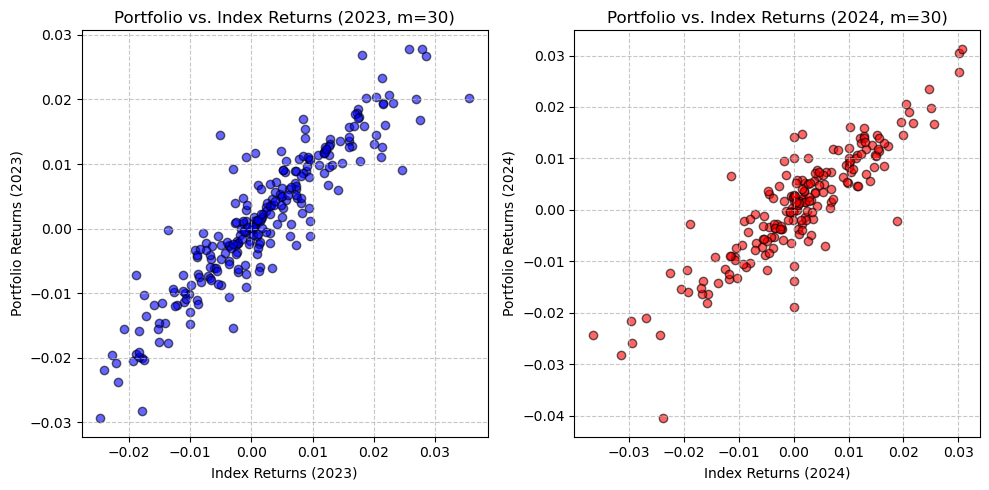

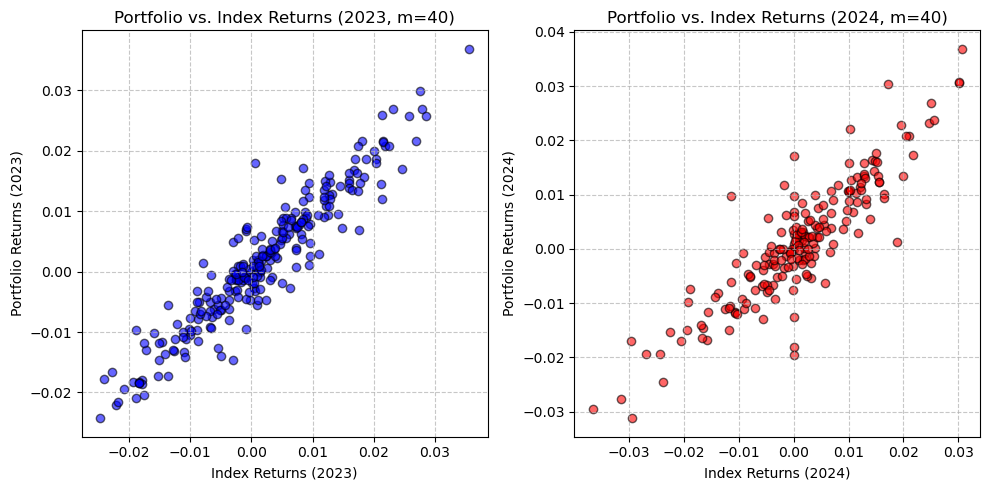

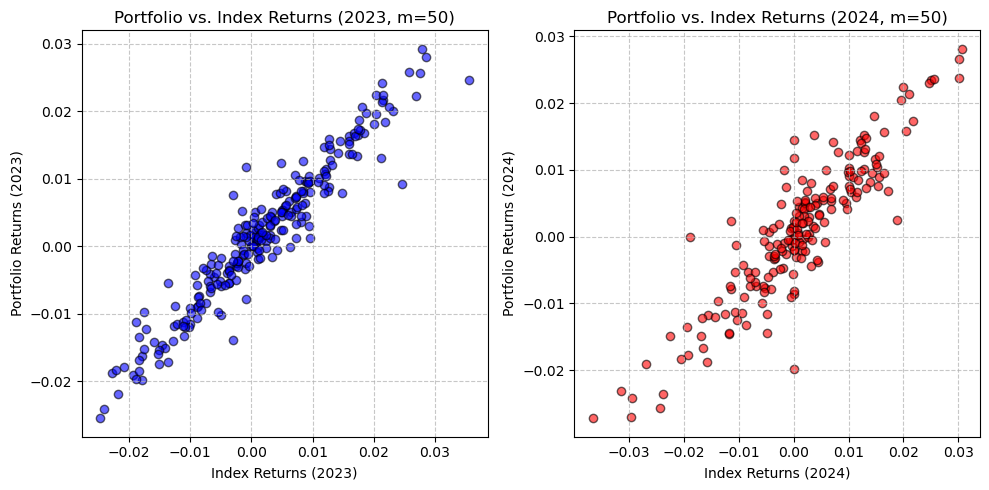

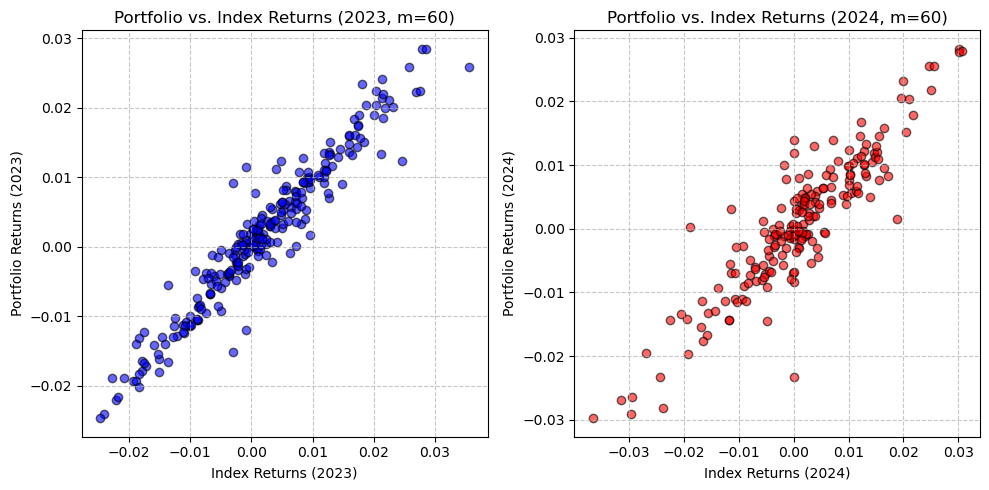

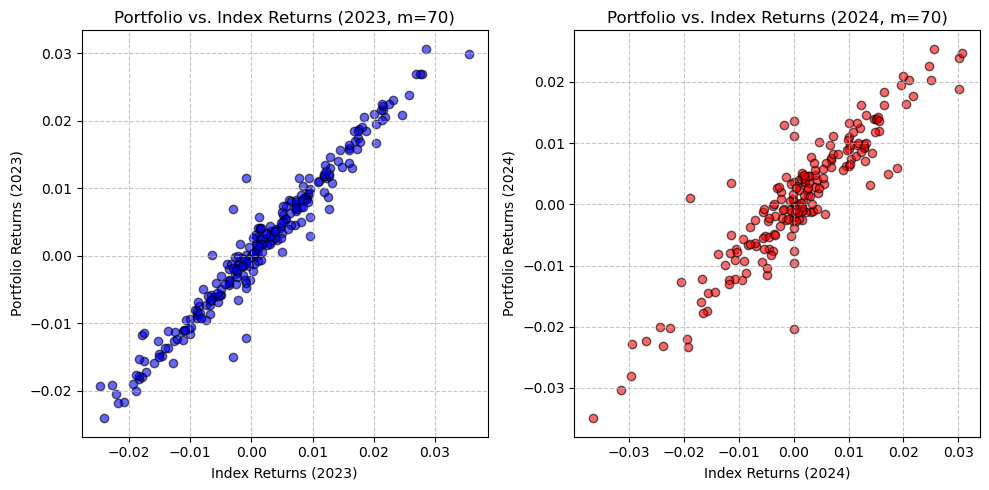

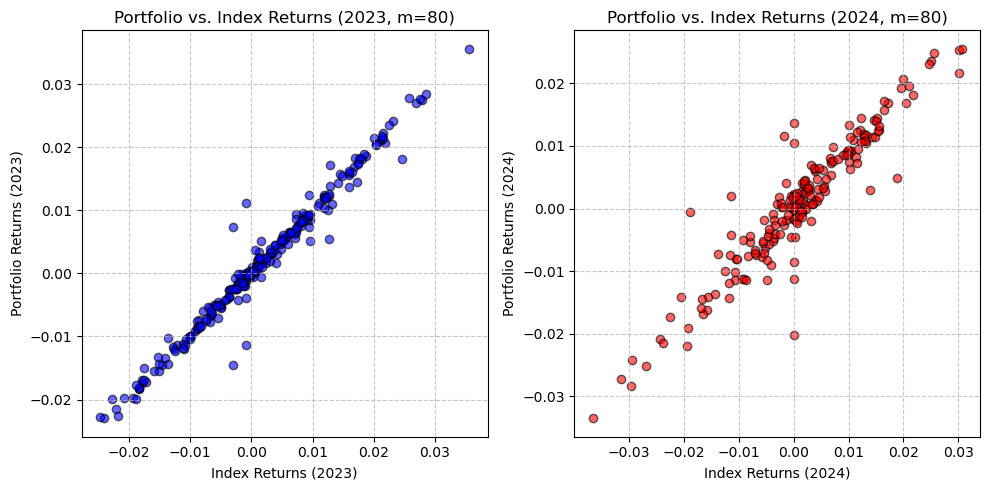

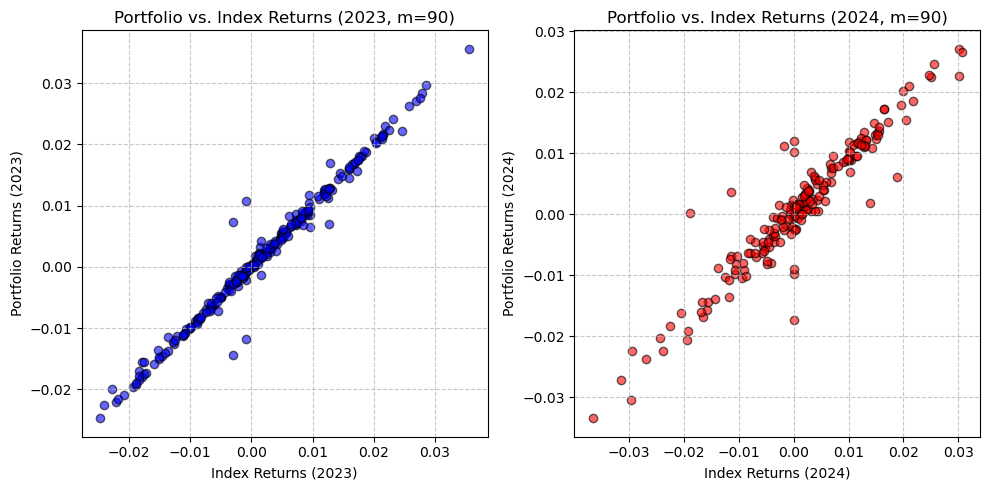

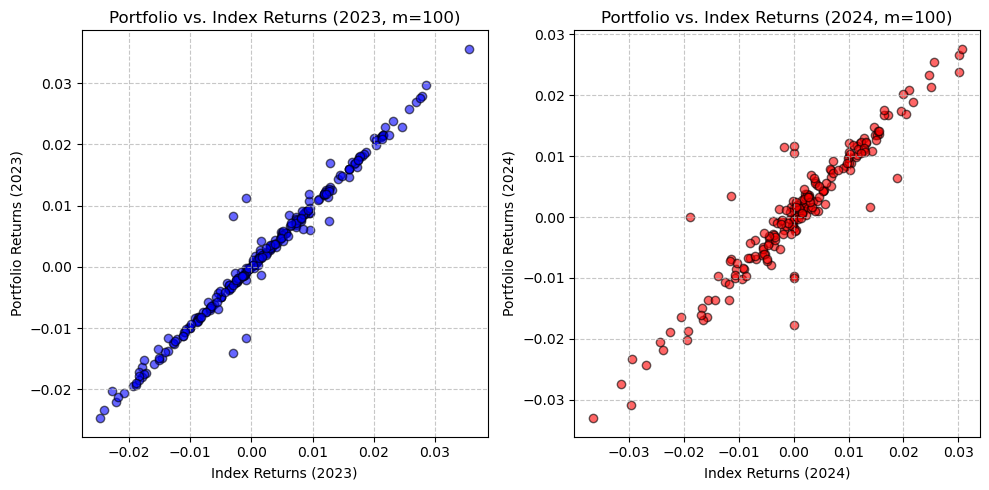

In [134]:
import matplotlib.pyplot as plt

def plot_portfolio_vs_index_scatter(returns_train_portfolios, returns_test_portfolios, index_returns_train, index_returns_test, m_values):
    for m in m_values:
        train_portfolio_returns = returns_train_portfolios[f'm_{m}']
        test_portfolio_returns = returns_test_portfolios[f'm_{m}']

        aligned_train = pd.DataFrame({
            'Index_Returns': index_returns_train,
            'Portfolio_Returns': train_portfolio_returns
        }).dropna()

        aligned_test = pd.DataFrame({
            'Index_Returns': index_returns_test,
            'Portfolio_Returns': test_portfolio_returns
        }).dropna()

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(aligned_train['Index_Returns'], aligned_train['Portfolio_Returns'], color='blue', alpha=0.6, edgecolor='black')
        plt.title(f'Portfolio vs. Index Returns (2023, m={m})')
        plt.xlabel('Index Returns (2023)')
        plt.ylabel('Portfolio Returns (2023)')
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.subplot(1, 2, 2)
        plt.scatter(aligned_test['Index_Returns'], aligned_test['Portfolio_Returns'], color='red', alpha=0.6, edgecolor='black')
        plt.title(f'Portfolio vs. Index Returns (2024, m={m})')
        plt.xlabel('Index Returns (2024)')
        plt.ylabel('Portfolio Returns (2024)')
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

m_values = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plot_portfolio_vs_index_scatter(returns_train_portfolios, returns_test_portfolios, index_returns_train, index_returns_test, m_values)


This graph shows the relationship between portfolio returns and index returns for different years (2023 and 2024) and different portfolio sizes (m = 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100). As the portfolio size (m) increases, the scatter plots show a stronger linear relationship between portfolio and index returns, indicating that larger portfolios align more closely with index performance. This suggests that as m grows, portfolio returns become more predictable and more correlated with the index returns

### Part 4 - MIP Approach: Calculation Portfolio Weights & Stocks directly

In [30]:
import time
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

dict_m = {}
dict_num_stocks = {}
dict_obj_val_train = {}
dict_rmse_train = {}
dict_obj_val_test = {}
dict_rmse_test = {}

returns_train_2 = pd.DataFrame({date_column: train_data[date_column], index_column: index_returns_train})
returns_test_2 = pd.DataFrame({date_column: test_data[date_column], index_column: index_returns_test})
weights_2 = pd.DataFrame(index=correlation_matrix.index)
k = 0
bigM = 1

lst_ms = [5] + [*range(10, num_stocks, 10)] + [num_stocks]

for m in lst_ms:
    start = time.time()

    weight_model = gp.Model()
    weight_model.ModelSense = GRB.MINIMIZE

    weights = weight_model.addVars(stock_list, vtype=GRB.CONTINUOUS, ub=[1] * len(stock_list), name='weights')
    selected = weight_model.addVars(stock_list, vtype=GRB.BINARY, name='selected')
    abs_diff = weight_model.addVars(date_range_train, vtype=GRB.CONTINUOUS, name='abs_diff')

    weight_model.addConstr(sum(weights[i] for i in stock_list) == 1, "sum_weights")
    weight_model.addConstrs(
        (abs_diff[j] >= (index_returns_train[j] - sum(weights[i] * returns_dict_train[i][j] for i in stock_list)) for j in date_range_train), 
        "abs_value_1"
    )
    weight_model.addConstrs(
        (abs_diff[j] >= -(index_returns_train[j] - sum(weights[i] * returns_dict_train[i][j] for i in stock_list)) for j in date_range_train), 
        "abs_value_2"
    )
    weight_model.addConstrs((weights[i] <= selected[i] * bigM for i in stock_list), "force_w0_y0")
    weight_model.addConstr(sum(selected[i] for i in stock_list) == m, "portfolio_size")

    weight_model.setObjective(sum(abs_diff[j] for j in date_range_train))

    weight_model.Params.OutputFlag = 0
    weight_model.Params.TIME_LIMIT = 3600
    # we are setting a time limit of 1 hour so that it doesn't run indefinitely for complex problems
    #You can tweak this parameter to experiment with your values of time limit
    
    

    weight_model.optimize()

    train_portfolio_returns = pd.Series(index=date_range_train, dtype=float)
    for j in date_range_train:
        train_portfolio_returns.loc[j] = sum(weights[i].X * returns_dict_train[i].get(j, 0) for i in stock_list)
    
    test_portfolio_returns = pd.Series(index=date_range_test, dtype=float)
    for j in date_range_test:
        test_portfolio_returns.loc[j] = sum(weights[i].X * returns_dict_test[i].get(j, 0) for i in stock_list)
    
    returns_train_2[f'm_{m}'] = train_portfolio_returns
    returns_test_2[f'm_{m}'] = test_portfolio_returns

    weights_2[f'm_{m}'] = [weights[i].X if selected[i].X > 0 else 0 for i in stock_list]
    
    end = time.time()
    
    k += 1
    dict_m[k] = m
    dict_num_stocks[k] = sum(1 for i in stock_list if weights[i].X > 0)
    dict_obj_val_train[k] = weight_model.objVal
    dict_rmse_train[k] = (((index_returns_train - train_portfolio_returns)**2).mean())**0.5
    dict_obj_val_test[k] = sum(abs(index_returns_test - test_portfolio_returns))
    dict_rmse_test[k] = (((index_returns_test - test_portfolio_returns)**2).mean())**0.5
    
    print(f'  m: {m} - Time: {(end-start)/60:.2f} minutes')
    
results_2 = pd.DataFrame({
    'm': dict_m, 
    '#stocks': dict_num_stocks, 
    'obj_val_train': dict_obj_val_train, 
    'rmse_train': dict_rmse_train, 
    'obj_val_test': dict_obj_val_test, 
    'rmse_test': dict_rmse_test
})

results_2.to_csv('02_1_results_MIP_approach.csv', index=False)
returns_train_2.to_csv('02_2_returns_MIP_train_portfolios.csv', index=False)
returns_test_2.to_csv('02_3_returns_MIP_oos_portfolios.csv', index=False)
weights_2.to_csv('02_4_weights_MIP_approach.csv')

results_2


  m: 5 - Time: 8.62 minutes
  m: 10 - Time: 60.04 minutes
  m: 20 - Time: 84.35 minutes
  m: 30 - Time: 63.48 minutes
  m: 40 - Time: 60.21 minutes
  m: 50 - Time: 63.87 minutes
  m: 60 - Time: 71.21 minutes
  m: 70 - Time: 1.69 minutes
  m: 80 - Time: 0.10 minutes
  m: 90 - Time: 0.02 minutes
  m: 100 - Time: 0.01 minutes


C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:2538: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,m,#stocks,obj_val_train,rmse_train,obj_val_test,rmse_test
1,5,5,0.695614,0.003821,0.797546,0.005583
2,10,10,0.405680,0.002561,0.654864,0.004700
3,20,20,0.248537,0.001818,0.550729,0.004145
4,30,30,0.195504,0.001674,0.427863,0.003648
5,40,40,0.170068,0.001627,0.405442,0.003551
6,50,50,0.158784,0.001616,0.404606,0.003561
7,60,60,0.154650,0.001632,0.402224,0.003544
8,70,70,0.151988,0.001643,0.400432,0.003571
9,80,77,0.151565,0.001646,0.404294,0.003575
10,90,78,0.151559,0.001649,0.404962,0.003580


In [160]:
# we have exported a copy of results to csv to validate the below graphs
mip_results = pd.read_csv(r'02_1_results_MIP_approach.csv')
train_portfolio_returns_2 = pd.read_csv(r'02_2_returns_MIP_train_portfolios.csv')
test_portfolio_returns_2 = pd.read_csv(r'02_3_returns_MIP_oos_portfolios.csv')
mip_weights = pd.read_csv(r'02_4_weights_MIP_approach.csv', index_col=0)

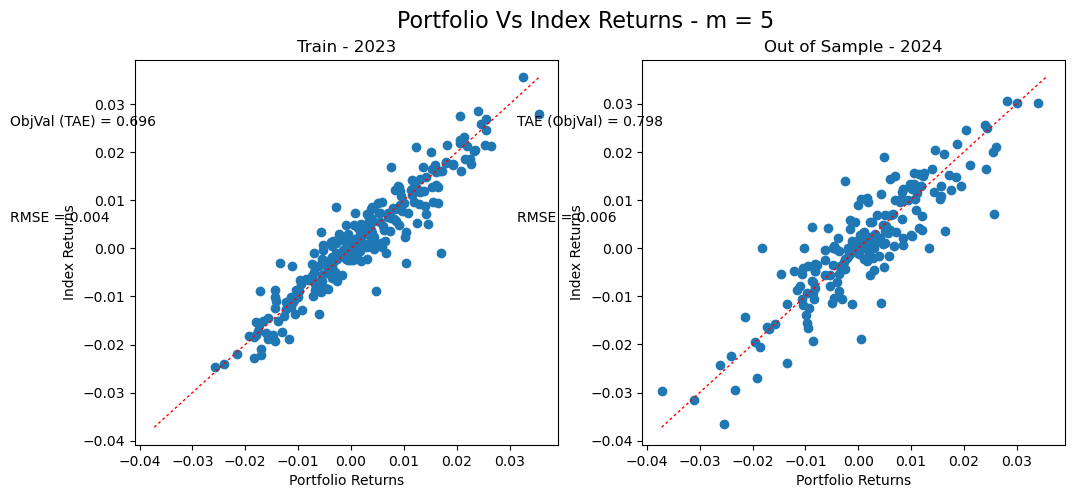

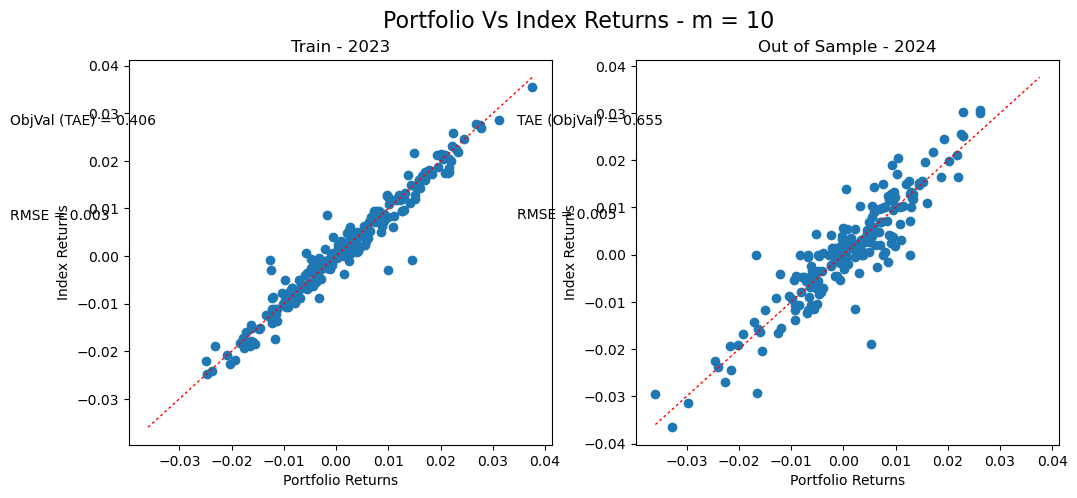

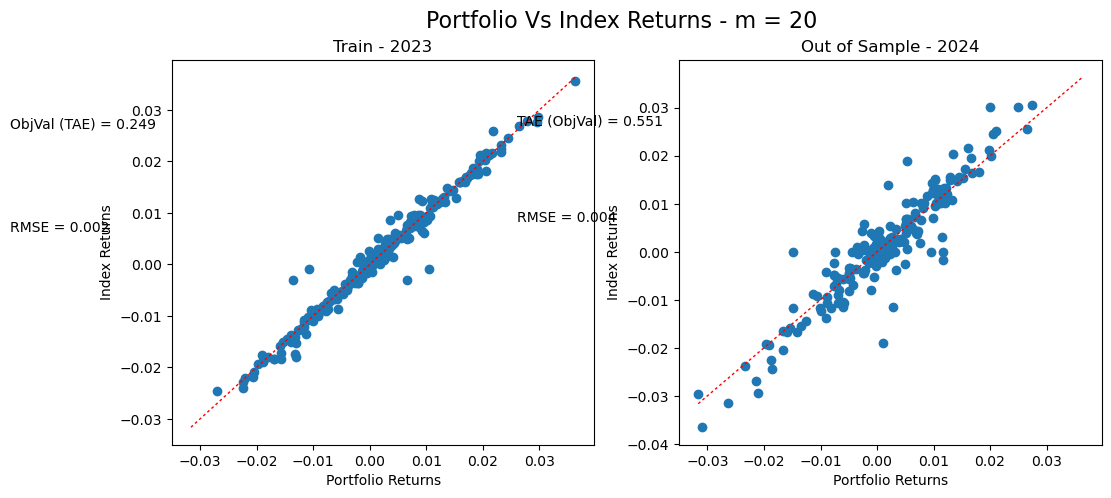

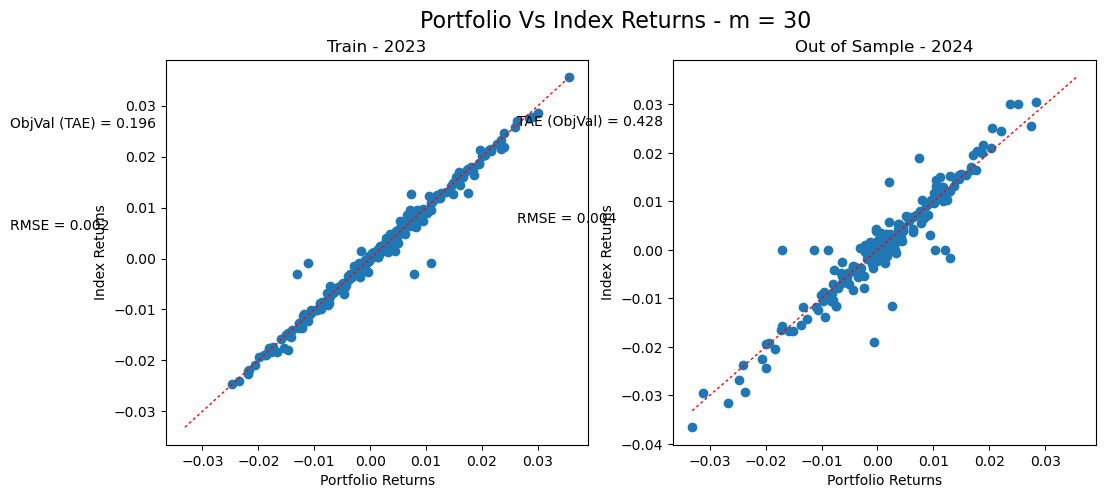

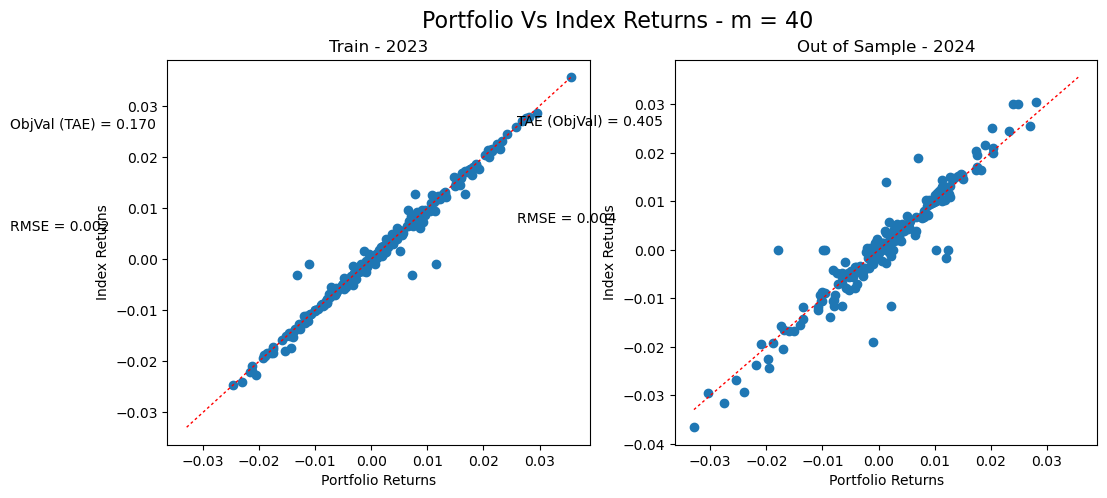

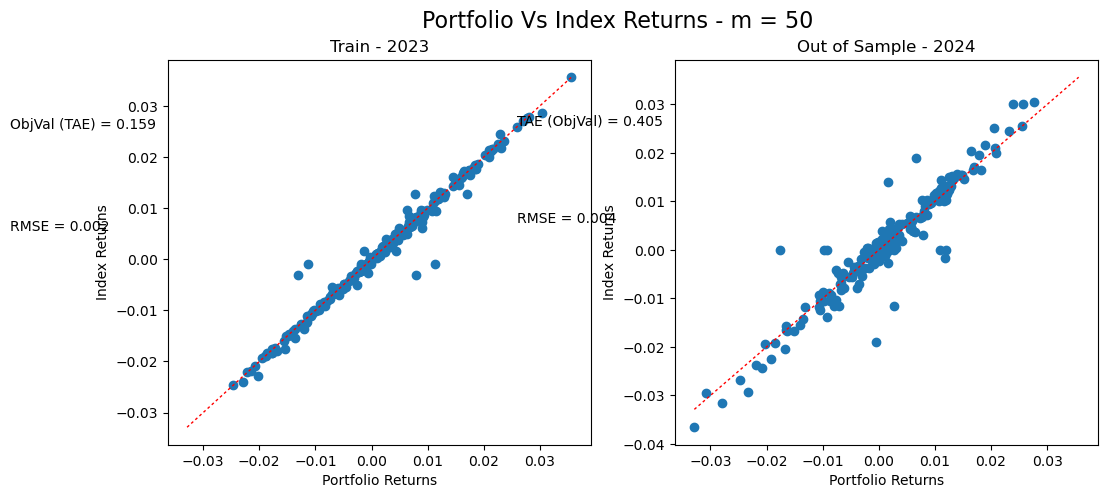

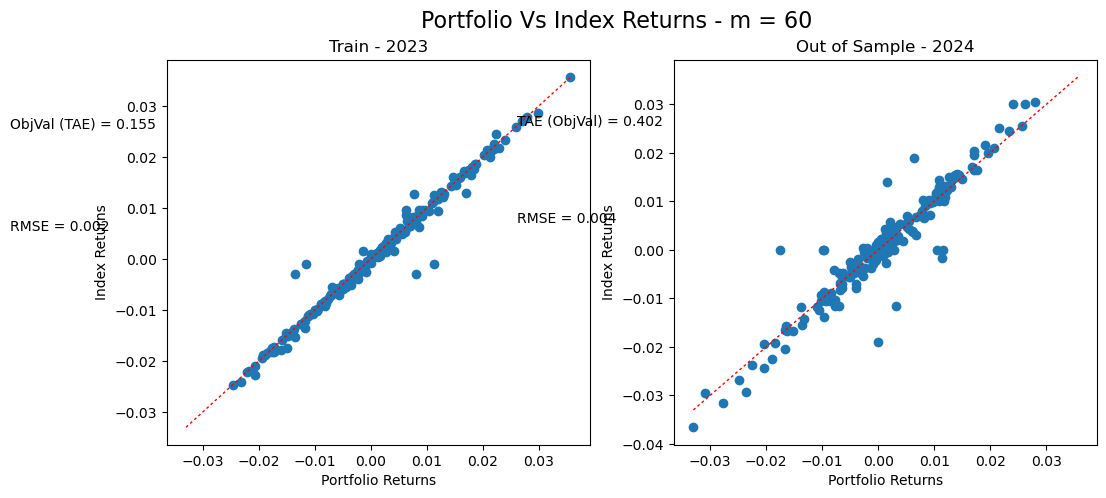

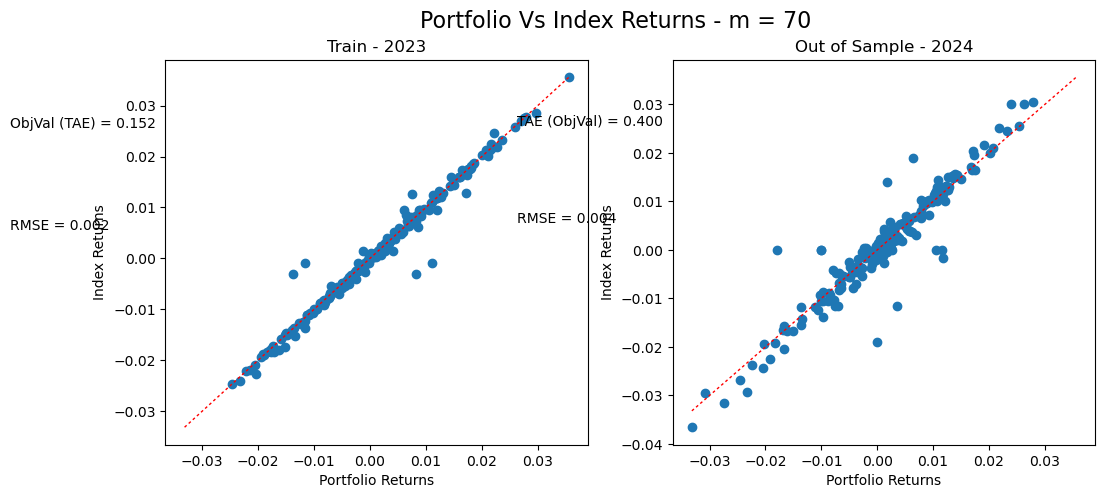

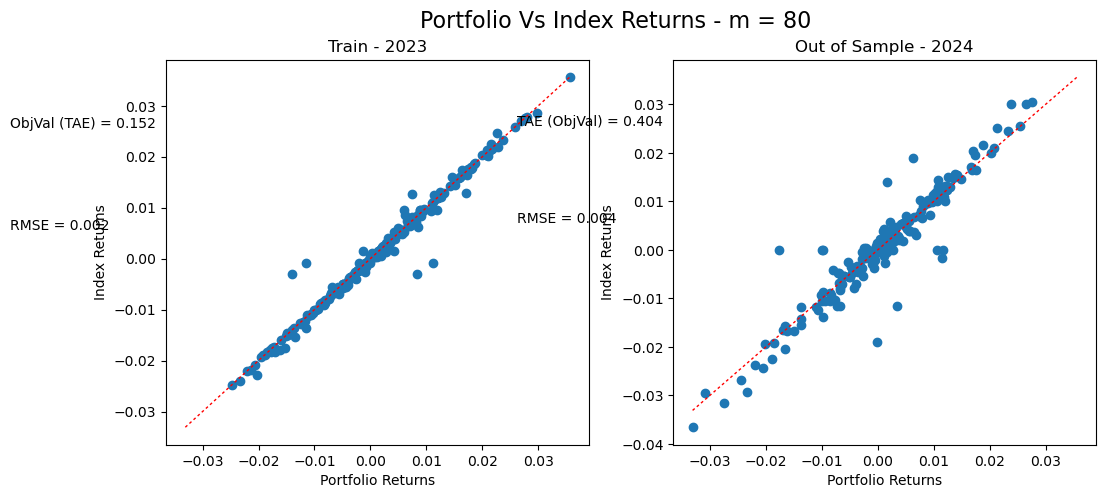

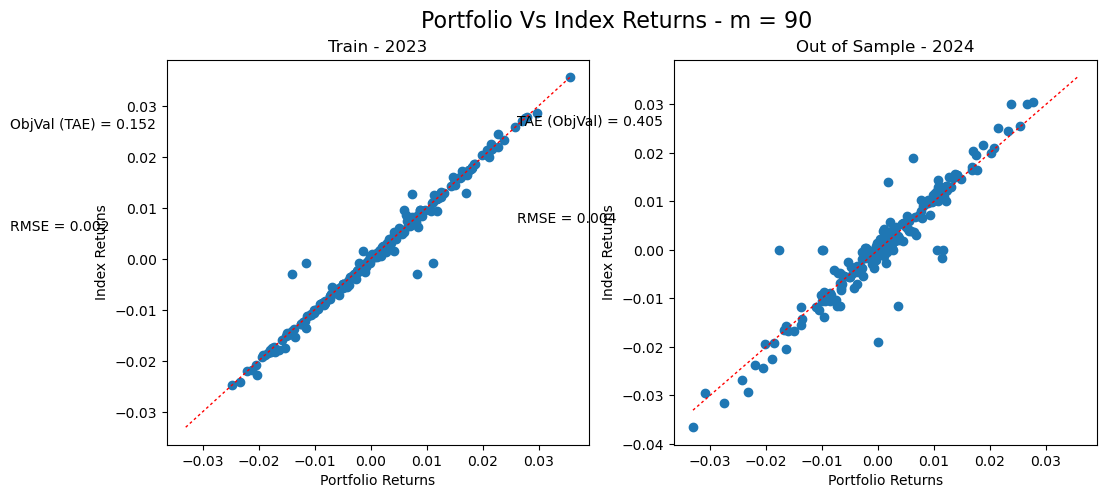

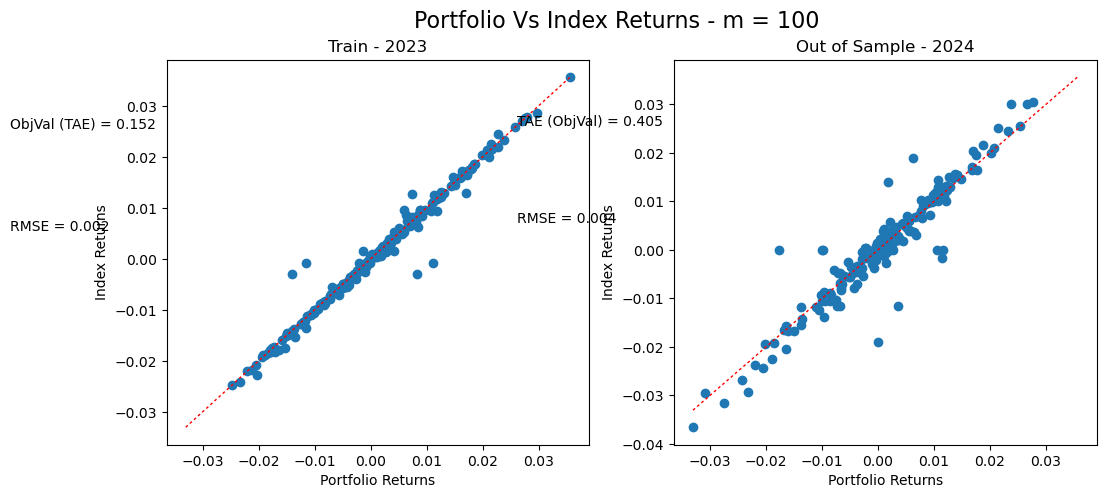

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the list of m values
m_values = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Iterate over each value of m and create plots
for m in m_values:
    # Calculate minimum and maximum for setting consistent axis limits
    min_d = min(train_portfolio_returns_2[f'm_{m}'].min(), test_portfolio_returns_2[f'm_{m}'].min())
    max_d = max(train_portfolio_returns_2[f'm_{m}'].max(), test_portfolio_returns_2[f'm_{m}'].max())
    
    # Retrieve metrics for the current value of m
    txt1 = mip_results[mip_results['m'] == m]['obj_val_train'].values[0]
    txt2 = mip_results[mip_results['m'] == m]['rmse_train'].values[0]
    txt3 = mip_results[mip_results['m'] == m]['obj_val_test'].values[0]
    txt4 = mip_results[mip_results['m'] == m]['rmse_test'].values[0]
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Portfolio Vs Index Returns - m = {m}', fontsize=16)
    
    # Graph for 2023 showing portfolio returns and index returns
    ax1.scatter(train_portfolio_returns_2[f'm_{m}'], train_portfolio_returns_2[index_column])
    ax1.plot([min_d, max_d], [min_d, max_d], 'r-', lw=1, dashes=[2, 2])
    ax1.text(max_d - 0.1, max_d - 0.01, 'ObjVal (TAE) = {0:.3f}'.format(txt1), horizontalalignment='left')
    ax1.text(max_d - 0.1, max_d - 0.03, 'RMSE = {0:.3f}'.format(txt2), horizontalalignment='left')
    ax1.set_ylabel('Index Returns')
    ax1.set_xlabel('Portfolio Returns')
    ax1.set_title('Train - 2023')
    
    # Graph for 2024 showing portfolio returns and index returns
    ax2.scatter(test_portfolio_returns_2[f'm_{m}'], test_portfolio_returns_2[index_column])
    ax2.plot([min_d, max_d], [min_d, max_d], 'r-', lw=1, dashes=[2, 2])
    ax2.text(max_d - 0.1, max_d - 0.01, 'TAE (ObjVal) = {0:.3f}'.format(txt3), horizontalalignment='left')
    ax2.text(max_d - 0.1, max_d - 0.03, 'RMSE = {0:.3f}'.format(txt4), horizontalalignment='left')
    ax2.set_ylabel('Index Returns')
    ax2.set_xlabel('Portfolio Returns')
    ax2.set_title('Out of Sample - 2024')
    
    # Show plot
    plt.show()


This graph illustrates the relationship between portfolio returns and index returns for a portfolio size of m = 5 through 100, comparing training data from 2023 with out-of-sample data from 2024. Both plots display a strong positive linear correlation, but the training data shows a slightly better fit. The out-of-sample data has a higher RMSE and TAE, indicating a minor decrease in predictive performance when applied to unseen data.

The below two graphs represent the absolute error and the RMSE error for MIP approach

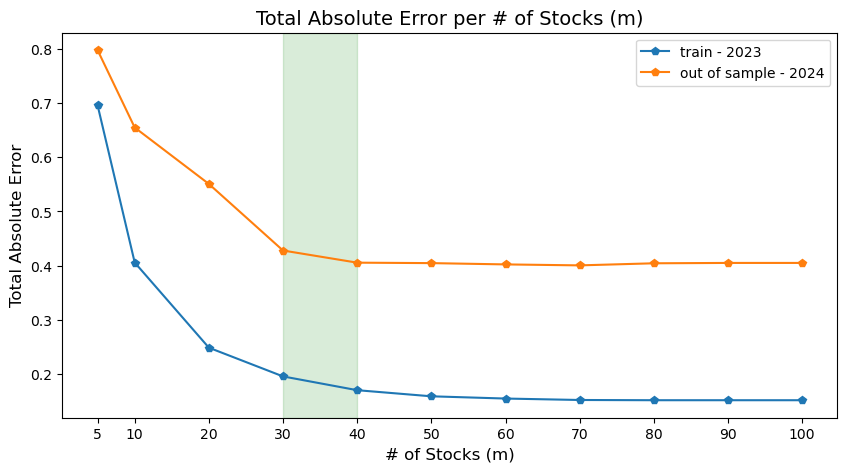

In [26]:
# Objective Val - MIP Approach: 

# Graph comparing 2023 and 2024 Total Absolute Errors for different number of stocks
plt.figure(figsize=(10, 5))
plt.plot(mip_results['m'], mip_results['obj_val_train'], marker='p', label='train - 2023')
plt.plot(mip_results['m'], mip_results['obj_val_test'], marker='p', label='out of sample - 2024')
plt.xticks(mip_results['m'].tolist())
plt.axvspan(30, 40, color='g', alpha=0.15)
plt.title('Total Absolute Error per # of Stocks (m)', fontsize=14)
plt.ylabel('Total Absolute Error', fontsize=12)
plt.xlabel('# of Stocks (m)', fontsize=12)
plt.legend()
plt.show()


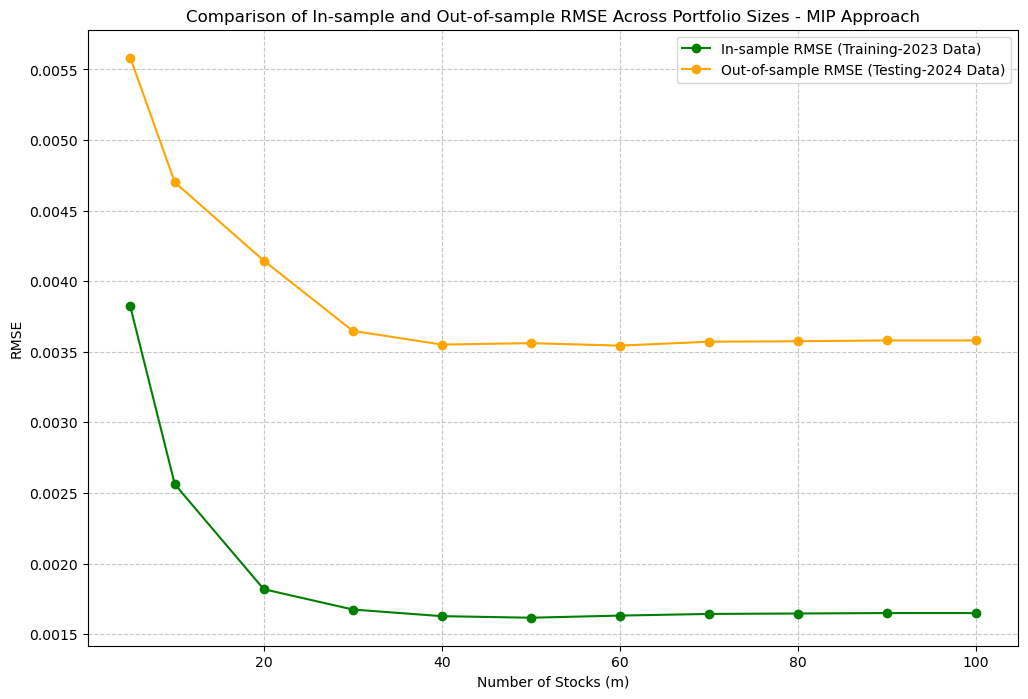

In [166]:
def plot_rmse_comparison_mip(mip_results):
    # Extracting the values for plotting
    m_values = mip_results['m']
    rmse_train = mip_results['rmse_train']
    rmse_test = mip_results['rmse_test']
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plotting RMSE for In-sample and Out-of-sample with different colors
    plt.plot(m_values, rmse_train, marker='o', linestyle='-', color='green', label='In-sample RMSE (Training-2023 Data)')
    plt.plot(m_values, rmse_test, marker='o', linestyle='-', color='orange', label='Out-of-sample RMSE (Testing-2024 Data)')
    
    # Adding titles and labels
    plt.title('Comparison of In-sample and Out-of-sample RMSE Across Portfolio Sizes - MIP Approach')
    plt.xlabel('Number of Stocks (m)')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Call the plotting function for RMSE comparison for the MIP approach
plot_rmse_comparison_mip(mip_results)


**Final Notes**

- The concept of diminishing returns becomes evident after reaching a portfolio size of 30-40 stocks. 
- Beyond this point, the reduction in errors slows down, indicating that adding more stocks yields progressively smaller improvements in performance. 
- This highlights that while larger portfolios may improve tracking slightly, the added complexity and computational resources may not justify the minimal gains in accuracy.